<a href="https://colab.research.google.com/github/la-suerte/PythonForSimplex---Antoine-Lesort/blob/master/P3_Duality_(code)_Antoine_Lesort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primal Solution:
Optimal values (x1, x2, x3): [ 0.  52.5 20. ]
Optimal objective value: 250.0

Feasibility Check for Q = (0, 52.5, 20):
Is Q feasible? Yes

Dual Solution:
Optimal values (y1, y2, y3): [0. 0. 0.]
Optimal objective value: 0.0

Complementary Slackness Check:
Is complementary slackness satisfied? Yes

Optimality Check for Q = (0, 52.5, 20):
Is Q optimal for the primal problem? No

Step 6: Visualization (Extra Feature)


<ipython-input-4-95e79f02db25>:80: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X1, X2, con, levels=[0, con.max()], alpha=0.2, label=f"Constraint {i+1}")


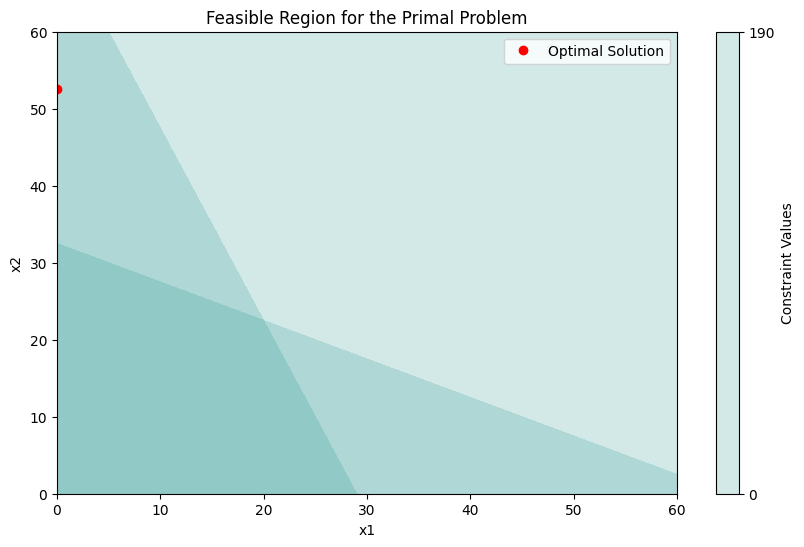

In [4]:
from scipy.optimize import linprog
import numpy as np

# Primal problem setup
# Objective function coefficients for max z = x1 + 4x2 + 2x3
c = [-1, -4, -2]  # Negated for linprog (minimization)

# Inequality constraint coefficients (Ax <= b)
A = [
    [5, 2, 2],
    [4, 8, -8],
    [1, 1, 4]
]
b = [145, 260, 190]


result_primal = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="highs")
x_primal = result_primal.x
optimal_primal_value = -result_primal.fun

print("Primal Solution:")
print(f"Optimal values (x1, x2, x3): {x_primal}")
print(f"Optimal objective value: {optimal_primal_value}")

Q = np.array([0, 52.5, 20])
feasibility = np.all(np.dot(A, Q) <= b) and np.all(Q >= 0)

print("\nFeasibility Check for Q = (0, 52.5, 20):")
print(f"Is Q feasible? {'Yes' if feasibility else 'No'}")


# w = 145y1 + 260y2 + 190y3
c_dual = [145, 260, 190]

A_dual = np.transpose(A)
b_dual = np.array([-1, -4, -2])

result_dual = linprog(c_dual, A_ub=-np.array(A_dual), b_ub=-np.array(b_dual), bounds=(0, None), method="highs")
y_dual = result_dual.x
optimal_dual_value = result_dual.fun

print("\nDual Solution:")
print(f"Optimal values (y1, y2, y3): {y_dual}")
print(f"Optimal objective value: {optimal_dual_value}")

slack_primal = np.dot(A, x_primal) - b
slack_dual = np.dot(A_dual, y_dual) - b_dual
complementary_slackness = all(
    np.isclose(slack_primal[i] * y_dual[i], 0) for i in range(len(y_dual))
)

print("\nComplementary Slackness Check:")
print(f"Is complementary slackness satisfied? {'Yes' if complementary_slackness else 'No'}")

# Check if Q is optimal
Q_is_optimal = feasibility and np.isclose(optimal_primal_value, optimal_dual_value)

print("\nOptimality Check for Q = (0, 52.5, 20):")
print(f"Is Q optimal for the primal problem? {'Yes' if Q_is_optimal else 'No'}")

print("\nStep 6: Visualization (Extra Feature)")
try:
    import matplotlib.pyplot as plt

    # Visualize constraints in a 2D projection (x1 and x2)
    x1 = np.linspace(0, 60, 400)
    x2 = np.linspace(0, 60, 400)
    X1, X2 = np.meshgrid(x1, x2)

    # Calculate constraints
    constraints = [
        145 - 5 * X1 - 2 * X2,
        260 - 4 * X1 - 8 * X2,
        190 - X1 - X2
    ]

    plt.figure(figsize=(10, 6))
    plt.title("Feasible Region for the Primal Problem")
    for i, con in enumerate(constraints):
        plt.contourf(X1, X2, con, levels=[0, con.max()], alpha=0.2, label=f"Constraint {i+1}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar(label="Constraint Values")

    # Mark the solution point
    plt.plot(x_primal[0], x_primal[1], 'ro', label="Optimal Solution")
    plt.legend()
    plt.show()

except ImportError:
    print("Matplotlib not installed. Skipping visualization.")

